## imports

In [1]:
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
#Keras imports
import tensorflow as tf
import tensorflow.keras.preprocessing as preprocessing
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras import optimizers

Using TensorFlow backend.


## pathways

In [20]:
not_path = os.listdir("../Data/Images")
not_path.remove(".DS_Store") #it likes to pop up from time to time
path_to_data = "../Data"

data_path = os.path.join('..', 'Data')

# test_path = os.path.join(data_path, 'test_images_3')
# train_path = os.path.join(data_path, 'train_images_3')
# val_path = os.path.join(data_path, 'val_images_3')


# images_path = os.path.join(data_path, 'Images')
# image_folders = os.listdir(images_path)
# test_folders = os.listdir(test_path)
# train_folders = os.listdir(train_path)
# val_folders = os.listdir(val_path)

In [21]:
train_dir = os.path.join(data_path, 'ExModeling_train')
test_dir = os.path.join(data_path, 'ExModeling_test')
val_dir = os.path.join(data_path, 'ExModeling_val')

## vis method

In [22]:
#from https://medium.com/intelligentmachines/convolutional-neural-network-and-regularization-techniques-with-tensorflow-and-keras-5a09e6e65dc7
#had to tweak some things to get it to work
def vis_history(history): 
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('acc')
    ax[1].plot(history.epoch, history.history["acc"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_acc"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

## modeling part 2

This time I'm starting with only 2 breeds, the Afgan Hound and the Maltese Dog, as they have the most images

In [23]:
img_size = 150
bch_size = 20

In [24]:
img_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, vertical_flip=True)

train_generator = img_gen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    color_mode='rgb',
    batch_size=bch_size,
    class_mode='categorical')

validation_generator = img_gen.flow_from_directory(
    val_dir, 
    target_size=(img_size, img_size), 
    color_mode='rgb',
    batch_size=bch_size, 
    class_mode='categorical')

test_generator = img_gen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    color_mode='rgb',
    batch_size=bch_size,
    class_mode='categorical',
    shuffle=False)


Found 441 images belonging to 2 classes.
Found 27 images belonging to 2 classes.
Found 23 images belonging to 2 classes.


This is the same as model_e from first notebook, but with less classes that contain more images

In [25]:
model_1 = models.Sequential() 
model_1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model_1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Conv2D(128, (3, 3)))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer =tf.keras.regularizers.l1( l=0.01) ))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Flatten())
model_1.add(layers.Dense(64, activation='relu'))
model_1.add(layers.Dense(64, activation='relu'))
model_1.add(layers.Dense(128, activation='relu',))
model_1.add(layers.Dense(2, activation='softmax'))

model_1.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

history_1 = model_1.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=10, 
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/10
100/100 [==============================] - 384s 4s/step - loss: 46.5915 - acc: 0.6865 - val_loss: 34.7607 - val_acc: 0.6904
Epoch 2/10
100/100 [==============================] - 424s 4s/step - loss: 25.8775 - acc: 0.7740 - val_loss: 18.1615 - val_acc: 0.5881
Epoch 3/10
100/100 [==============================] - 415s 4s/step - loss: 12.0238 - acc: 0.8015 - val_loss: 7.3069 - val_acc: 0.6874
Epoch 4/10
100/100 [==============================] - 369s 4s/step - loss: 4.1627 - acc: 0.7980 - val_loss: 2.2713 - val_acc: 0.6770
Epoch 5/10
100/100 [==============================] - 375s 4s/step - loss: 1.6677 - acc: 0.8249 - val_loss: 1.3892 - val_acc: 0.7852
Epoch 6/10
100/100 [==============================] - 349s 3s/step - loss: 1.1682 - acc: 0.8299 - val_loss: 1.1155 - val_acc: 0.7778
Epoch 7/10
100/100 [==============================] - 373s 4s/step - loss: 0.9405 - acc: 0.8345 - val_loss: 1.0147 - val_acc: 0.7778
Epoch 8/10
100/100 [==============================] - 376s 4s/st

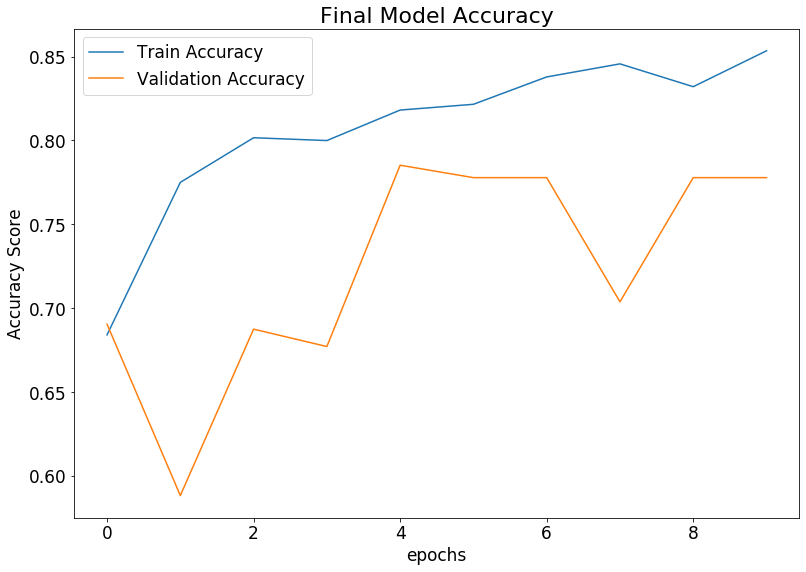

In [26]:

fig, ax = plt.subplots(figsize=(13,9))
ax.set_title('Final Model Accuracy', fontsize = 22)
ax.plot(history_1.epoch, history_1.history["acc"], label="Train Accuracy")
ax.plot(history_1.epoch, history_1.history["val_acc"], label="Validation Accuracy")
plt.xlabel('epochs', fontsize = 17)
plt.ylabel('Accuracy Score', fontsize = 17)
ax.tick_params(axis = 'both', labelsize = 17)
ax.legend(fontsize = 17)

I'm feeling pretty satisfied with this one. I'm running short on time so for now, this is the final model

## Evaluation

In [32]:
test_loss, test_acc = model_1.evaluate_generator(test_generator, steps=50)

In [33]:
print(test_acc)

0.8539130604785422
